In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

import time

Creazione del grafo con l'algoritmo di Barabasi-Albert

In [2]:
N = 50
P = 0.25
G = nx.erdos_renyi_graph(N, P)

while min([d for n, d in G.degree()]) == 0:
    G = nx.erdos_renyi_graph(N, P)

Rappresentazione del grafico

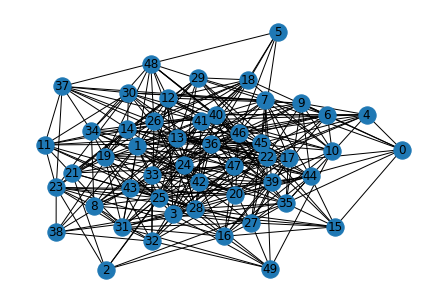

In [3]:
nx.draw(G, with_labels=True)
plt.show()

Estrazione della matrice di adiacenza A

In [4]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)] 
    for c in b : 
        A[a][c] = 1

Estrazione della matrice di stocastica P e calcolo dei suoi autovalori e autovettori

In [5]:
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a]

In [6]:
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)
pS = autovettoriP[0]
if pS[0] < 0:
    pS = -pS
#np.dot(np.transpose(matrix),autovettori[0])

In [7]:
autovaloriP

array([ 1.        ,  0.43677121, -0.47422783,  0.40029912,  0.3694374 ,
        0.35138444,  0.34954247, -0.42422876,  0.31502056,  0.29022379,
       -0.37679456, -0.36259176, -0.34788515, -0.33653   ,  0.2472927 ,
        0.22846333,  0.22058654,  0.2092962 ,  0.18386548,  0.17472455,
       -0.30564671, -0.29416119,  0.15287937,  0.14377287,  0.11621394,
        0.10891199,  0.10028317,  0.0733273 ,  0.04765461,  0.03457429,
        0.01977405,  0.00625007, -0.26550645, -0.25162722, -0.24326634,
       -0.02368654, -0.04193538, -0.05066075, -0.06192233, -0.22397892,
       -0.08388641, -0.10096371, -0.10978761, -0.12735928, -0.13902588,
       -0.17090675, -0.1971524 , -0.19415806, -0.18937019, -0.18328924])

Definizione della matrice laplaciana L e calcolo dei suoi autovettori e autovalori

In [8]:
matrixL = np.identity(N) - matrixP

In [9]:
autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)
pS_L = autovettoriL[0]
if pS_L[0] < 0:
    pS_L = -pS_L

In [10]:
autovaloriL

array([-5.92948620e-17,  1.47422783e+00,  5.63228785e-01,  5.99700884e-01,
        1.42422876e+00,  6.30562603e-01,  6.48615559e-01,  6.50457528e-01,
        6.84979441e-01,  7.09776210e-01,  1.37679456e+00,  1.36259176e+00,
        1.34788515e+00,  1.33653000e+00,  7.52707303e-01,  7.71536671e-01,
        7.79413463e-01,  7.90703804e-01,  1.30564671e+00,  1.29416119e+00,
        8.16134519e-01,  8.25275451e-01,  8.47120625e-01,  8.56227133e-01,
        8.83786058e-01,  8.91088009e-01,  8.99716826e-01,  1.26550645e+00,
        1.25162722e+00,  1.24326634e+00,  9.26672701e-01,  9.52345392e-01,
        9.65425712e-01,  9.80225950e-01,  9.93749925e-01,  1.22397892e+00,
        1.02368654e+00,  1.04193538e+00,  1.05066075e+00,  1.06192233e+00,
        1.08388641e+00,  1.10096371e+00,  1.10978761e+00,  1.12735928e+00,
        1.13902588e+00,  1.17090675e+00,  1.19715240e+00,  1.19415806e+00,
        1.18937019e+00,  1.18328924e+00])

La distribuzione stazionaria e il valore di Fiedler estratto dalle due matrici L e P coincidono fino alla 13-esima cifra decimale

In [11]:
i = 13
np.round(pS, i) == np.round(pS_L, i)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [12]:
round(1-max(autovaloriP[1:]), i) == round(min(autovaloriL[1:]), i)

True

Definizione del valore valore di Fiedler e della distribuzione stazionaria approssimate

In [13]:
FiedlerValue = round(min(autovaloriL[1:]), i)
FiedlerValue

0.5632287851299

In [14]:
pS = np.round(pS, i)

Assegnazione degli individui ai nodi per l'evoluzione della dinamica. L'assegnazione degli individui è fatta secondo una distribuzione uniforme.

In [15]:
walker_per_node = 2
for n in G.nodes:
    G.nodes[n]['N_i'] = walker_per_node

In [16]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[new_node] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[n]
    history += [evolution]

In [17]:
history = [[walker_per_node] * len(G.nodes)]
time_steps = int(1e5)

In [18]:
t0 = time.time()

for t in range(time_steps):
    dynamic_evolution(G, history)
    
print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 2 minutes and 54.56527924537659 seconds


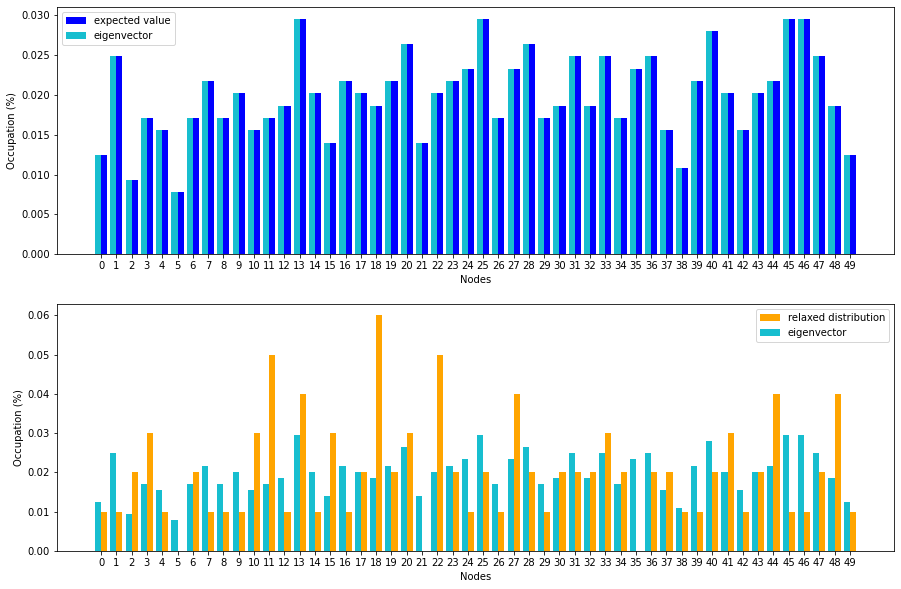

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(0.3*N, 10))

# for n in range(100):
#     if n == 99:
#         plt.plot(G.nodes, [h/sum(history[len(history)-1]) for h in history[len(history)-1]], 'r', label = 'relaxed distribution', alpha = 1)
#     else:
#         y = int(n * len(history) / 100)
#         plt.plot(G.nodes, [h/sum(history[y]) for h in history[y]], '#ca9bf7', alpha = 0.05)
# plt.plot(G.nodes, [h/sum(pS) for h in pS], 'b', label = "eigenvector", alpha = 1)

pS2 = [d for n, d in G.degree()]
# pS2 = [h/sum(pS2) for h in pS2]

ax[0].bar(G.nodes, [h/sum(pS2) for h in pS2], width=0.4, align='edge', color='blue', label = "expected value")
ax[0].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label = "eigenvector")

ax[1].bar(G.nodes, [h/sum(history[-1]) for h in history[-1]], width=0.4, 
       align='edge', color='orange', label = 'relaxed distribution')
ax[1].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label = "eigenvector")

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel("Nodes")
    ax[i].set_ylabel("Occupation (%)")
    ax[i].set_xticks(np.arange(0, N, 1))
#     ax[i].grid(True)


plt.show()